In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from layers import Dense
from models import Sequential

In [2]:
df = pd.read_csv("../Data/mnist.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
show_sample_x = np.array(df.iloc[0, 1:])
show_sample_y = df.iloc[0, 0]

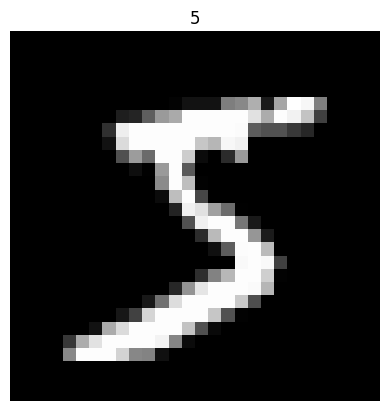

In [4]:
plt.title(show_sample_y)
plt.axis("off")
plt.imshow(show_sample_x.reshape(28, 28), cmap="gray");

In [5]:
def ohe(y):
    output = np.zeros((y.size, y.max()+1))
    output[np.arange(y.size), y] = 1
    return output.T

In [6]:
X, y = df.drop(columns=["label"]), df["label"]
X = np.array(X) / 255
y = ohe(y)
print(f"Shapes: X: {X.shape} | y: {y.shape}")

Shapes: X: (60000, 784) | y: (10, 60000)


In [7]:
model = Sequential([
    Dense(30, "relu"),
    Dense(1, "relu"),
    # Dense(10, "softmax")
])

In [8]:
model.compile("sgd", "mse")

In [9]:
pp = np.array(df["label"]).reshape(-1, 1).T

In [10]:
model.fit(X, pp, epochs=50, verbosity_step=1, learning_rate=0.01)

Epoch: 0 | Loss: 11.016946607449858
Epoch: 1 | Loss: 11.016989177664533
Epoch: 2 | Loss: 11.01703175108975
Epoch: 3 | Loss: 11.017074327725783
Epoch: 4 | Loss: 11.017116907572902
Epoch: 5 | Loss: 11.017159490631386
Epoch: 6 | Loss: 11.017202076901505
Epoch: 7 | Loss: 11.017244666383533
Epoch: 8 | Loss: 11.017287259077742
Epoch: 9 | Loss: 11.017329854984407
Epoch: 10 | Loss: 11.017372454103795
Epoch: 11 | Loss: 11.01741505643619
Epoch: 12 | Loss: 11.017457661981862
Epoch: 13 | Loss: 11.017500270741081
Epoch: 14 | Loss: 11.017542882714121
Epoch: 15 | Loss: 11.017585497901257
Epoch: 16 | Loss: 11.017628116302763
Epoch: 17 | Loss: 11.017670737918912
Epoch: 18 | Loss: 11.017713362749978
Epoch: 19 | Loss: 11.017755990796232
Epoch: 20 | Loss: 11.017798622057951
Epoch: 21 | Loss: 11.017841256535405
Epoch: 22 | Loss: 11.017883894228872
Epoch: 23 | Loss: 11.017926535138622
Epoch: 24 | Loss: 11.017969179264933
Epoch: 25 | Loss: 11.018011826608074
Epoch: 26 | Loss: 11.018054477168317
Epoch: 27 | L

array([[4.85410816, 5.52219956, 3.49366692, ..., 3.95957742, 3.66011217,
        3.71122504]])

In [11]:
res = model.predict(X[:2])

In [12]:
np.argmax(res, axis=0)

array([0, 0])

In [13]:
np.argmax(y[:2], axis=1)

array([1, 3])